<a href="https://colab.research.google.com/github/HananLuayAli/HananLuayAli/blob/main/KNN_Python_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing Required libraries and displaying first rows from the datase
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

file_path = "Real estate.csv"
data = pd.read_csv(file_path)

print(data.head())

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [12]:
# Feature selection
X = data[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]  # Features
y = data['Y house price of unit area']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model
k = 4  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Compare actual vs predicted prices (optional)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

Mean Squared Error: 35.802545180722895
R-squared: 0.7865844080586252
     Actual  Predicted
358    45.1     49.425
350    42.3     38.000
373    52.2     49.125
399    37.3     36.375
369    22.8     25.825


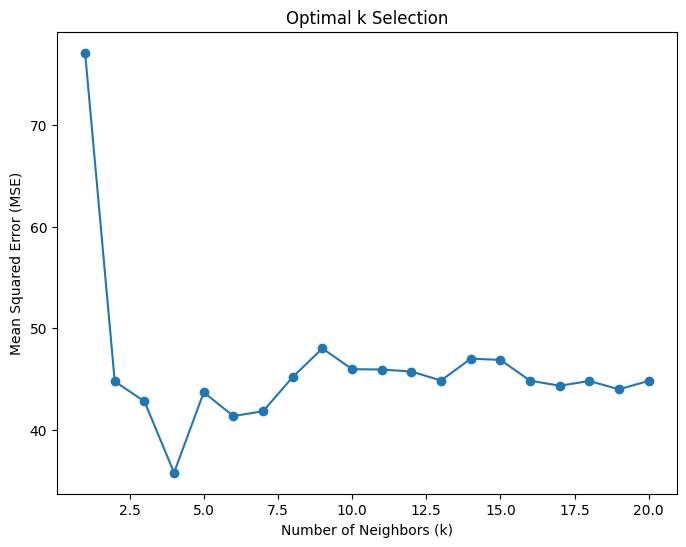

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# List to store MSE for each k
mse_values = []

# Test different k values
k_range = range(1, 21)  # Test k from 1 to 20
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot MSE vs k
plt.figure(figsize=(8, 6))
plt.plot(k_range, mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Optimal k Selection')
plt.show()
